<a href="https://colab.research.google.com/github/AmirHoseein99/Depression-Engine/blob/master/Spectograms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import pickle
import librosa
import sklearn
import logging
import itertools
import numpy as np
import pandas as pd
import librosa.display
import tensorflow as tf
from keras import layers  
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
! pip install git+https://github.com/artemmavrin/focal-loss.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_test_path = r'/content/drive/MyDrive/test_features/MFCCs/all_X_test'
y_test_path = r"/content/drive/MyDrive/test_labels/y_test.pkl"
X_test_dict = pd.read_pickle(X_test_path)
y_test_dict = pd.read_pickle(y_test_path)
X_test = []
y_test = []
for key in X_test_dict.keys():
  X_test.append(X_test_dict[key])
  y_test.append(y_test_dict[key])
X_test = [item for sublist in X_test for item in sublist]
y_test = [item for sublist in y_test for item in sublist]
X_test = np.array(X_test)
y_test= np.array(y_test)
# X_test_dict = []
# y_test_dict = []

In [ ]:
X_train_path = r'/content/drive/MyDrive/train_features/MFCCs/X_train.pkl'
y_train_path = r'/content/drive/MyDrive/train_labels/y_train_dict.pkl'
X_valid_path = r"/content/drive/MyDrive/valid_features/MFCCs/X_valid"
y_valid_path = r"/content/drive/MyDrive/valid_labels/y_valid.pkl"

In [ ]:
X_train_dict       = pd.read_pickle(X_train_path)
X_train_delta_dict = pd.read_pickle("/content/drive/MyDrive/train_features/MFCCs/X_train_delta.pkl")
y_train_dict       = pd.read_pickle(y_train_path)
X_valid_dict       = pd.read_pickle(X_valid_path)
X_valid_delta_dict = pd.read_pickle("/content/drive/MyDrive/valid_features/MFCCs/X_valid_delta")
y_valid_dict       = pd.read_pickle(y_valid_path)

In [ ]:
X_train_dict = []
X_train_delta_dict = []
y_train_dict = []
y_valid_dict = []
X_valid_dict = []
X_valid_delta_dict = []
delta_X_train = []
delta_X_valid = []

In [ ]:
X_train = []
delta_X_train = []
y_train = []
for key in X_train_dict.keys():
  X_train.append(X_train_dict[key])
  delta_X_train.append(X_train_delta_dict[key])
  y_train.append(y_train_dict[key])
X_train = [item for sublist in X_train for item in sublist]
delta_X_train = [item for sublist in delta_X_train for item in sublist]
y_train = [item for sublist in y_train for item in sublist]
X_train = np.array(X_train)
delta_X_train = np.array(delta_X_train)
y_train = np.array(y_train)

In [ ]:
X_valid = []
delta_X_valid = []
y_valid = []
for key in y_valid_dict.keys():
  X_valid.append(X_valid_dict[key])
  delta_X_valid.append(X_valid_delta_dict[key])
  y_valid.append(y_valid_dict[key])
X_valid = [item for sublist in X_valid for item in sublist]
delta_X_valid = [item for sublist in delta_X_valid for item in sublist]
y_valid = [item for sublist in y_valid for item in sublist]
X_valid = np.array(X_valid)
delta_X_valid = np.array(delta_X_valid)
y_valid = np.array(y_valid)

In [ ]:
X_train = np.append(X_train, delta_X_train, axis = 1)
X_valid = np.append(X_valid, delta_X_valid, axis = 1)

In [ ]:
def readnpyfiles (path):
  all_filles = {}
  all_files = glob.glob(path + "/*.npy")
  for filename in all_files:
      fille = np.load(filename)
      all_filles[int(filename.split("/")[5].split(".")[0])] = fille
  return all_filles

In [ ]:
X_train = readnpyfiles(X_train_path)
y_train = readnpyfiles(y_train_path)
X_valid = readnpyfiles(X_valid_path)
y_valid = readnpyfiles(y_valid_path)

In [ ]:
X_valid  = np.array(list(X_valid .values()))
y_valid  = np.array(list(y_valid .values()))
X_valid = [item for sublist in X_valid for item in sublist]
y_valid = [item for sublist in y_valid for item in sublist]
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [ ]:
X_train = np.array(list(X_train.values()))
y_train = np.array(list(y_train.values()))
X_train = [item for sublist in X_train for item in sublist]
y_train = [item for sublist in y_train for item in sublist]
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices(X_train)
valid_ds = tf.data.Dataset.from_tensor_slices(X_valid)

In [ ]:
batch_size = 32
n_steps = 100 
# window_length = 100
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, train=False):
  window_length = n_steps + 1 # target = input shifted 1 character ahead
  ds = ds.window(window_length, shift=100, drop_remainder=True)

  if train == True :
    ds = ds.shuffle(100)

  ds = ds.batch(batch_size)
  ds = ds.map(lambda windows: (windows[:, :-1], windows[:, -1]))
  return ds.prefetch(AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, train=True)
valid_ds = prepare(valid_ds)

In [ ]:
# pd.to_pickle(X_train, "/content/drive/MyDrive/train_features/X_train.pkl")
# pd.to_pickle(y_train, "/content/drive/MyDrive/train_features/y_train.pkl")
# pd.to_pickle(X_valid, "/content/drive/MyDrive/X_valid.pkl")
# pd.to_pickle(y_valid, "/content/drive/MyDrive/y_valid.pkl")

In [ ]:
X_train = pd.read_pickle(X_train_path)
y_train = pd.read_pickle(y_train_path)
# X_valid = pd.read_pickle("/content/drive/MyDrive/valid_features/MFCCs/X_valid.pkl")
# y_valid = pd.read_pickle("/content/drive/MyDrive/valid_labels/windowed_y_valid.pkl")

In [ ]:
from scipy import stats
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X[i:(i + time_steps)]
        labels = y[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [ ]:
TIME_STEPS = 64
STEP = 64

X_train, y_train = create_dataset(
    X_train,
    y_train,
    TIME_STEPS,
    STEP
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)

In [ ]:
# X_train = X_train.reshape((X_train.shape[0], 1,X_train.shape[1]))
# X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))

In [ ]:
conv_input = keras.layers.Input(X_train.shape[1:])

conv1 = keras.layers.Conv1D(filters=64, kernel_size=4, padding="same", )(conv_input)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.ReLU()(conv1)

# dropout = keras.layers.Dropout(.4)(conv1)

conv2 = keras.layers.Conv1D(filters=64, kernel_size=4, padding="same", activation = 'relu')(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.ReLU()(conv2)

dropout1 = keras.layers.Dropout(.5)(conv2)

# conv3 = keras.layers.Conv1D(filters=128, kernel_size=4, padding="same")(dropout1)
# conv3 = keras.layers.BatchNormalization()(conv3)
# conv3 = keras.layers.ReLU()(conv3)

# conv4 = keras.layers.Conv1D(filters=128, kernel_size=4, padding="same")(conv3)
# conv4 = keras.layers.BatchNormalization()(conv4)
# conv4 = keras.layers.ReLU()(conv4)


# dropout2 = keras.layers.Dropout(.5)(conv4)

gap = keras.layers.GlobalAveragePooling1D()(dropout1)

# Dense1 = keras.layers.Dense(32)(gap)
# Dense1 = keras.layers.ReLU()(Dense1)

# Dense2 = keras.layers.Dense(5)(gap)
# Dense2 = keras.layers.ReLU()(Dense2)

conv_output = keras.layers.Dense(1, activation="sigmoid")(gap)

# keras.models.Model(inputs=input_layer, outputs=conv_output)

conv_model = keras.Model(conv_input, conv_output)
# model = make_model(input_shape=X_valid.shape[1:])

In [ ]:
plot_model(conv_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras import layers

input_spectrogram = layers.Input((None, 52))

Reshape= layers.Reshape((-1, 52, 1))(input_spectrogram)

Conv1 = layers.Conv2D(filters=32, kernel_size=3, padding="same", activation ='relu')(Reshape)
Conv1 = layers.BatchNormalization()(Conv1)
Conv1 = layers.ReLU()(Conv1)


Conv2 = layers.Conv2D(filters=64, kernel_size=3, padding="same", activation ='relu')(Conv1)
Conv2 = layers.BatchNormalization()(Conv2)
Conv2 = layers.ReLU()(Conv2)


Reshape = layers.Reshape((-1, Conv2.shape[-2] * Conv2.shape[-1]))(Conv2)



Gru1 = layers.GRU(units=64, return_sequences=True, dropout=.3)(Reshape)
Gru2 = layers.GRU(units=64, return_sequences=True, dropout=.3)(Gru1)

gap = keras.layers.GlobalAveragePooling1D()(Gru2)

hybrid_output = layers.Dense(units=1, activation="sigmoid")(gap)

hybrid_model = keras.Model(input_spectrogram, hybrid_output)

In [ ]:
plot_model(hybrid_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 500
batch_size = 1024
# import focal_loss

hybrid_callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/hybrid_model/weights.{epoch:02d}-{val_loss:.4f}.hdf5.h5", monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

conv_callbacks = [
    keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/conv_model/weights.{epoch:02d}-{val_loss:.4f}.hdf5.h5", monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]


tf.get_logger().setLevel(logging.ERROR)

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.01)
conv_model.compile(
    optimizer="adam",
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", keras.metrics.AUC()],
)

#  validation_data=(X_valid, y_valid)
history = conv_model.fit(
    X_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=conv_callbacks, validation_split=.1, verbose=1)
#last epoch 12

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
hybrid_model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["accuracy", keras.metrics.AUC()],
)
history = hybrid_model.fit(
X_train, y_train, batch_size=batch_size, epochs=50, callbacks=hybrid_callbacks, verbose=1,  validation_data=(X_valid, y_valid))

Epoch 1/500
9459/9459 [==============================] - 649s 68ms/step - loss: 0.2994 - accuracy: 0.8742 - auc: 0.9397 - val_loss: 0.3032 - val_accuracy: 0.8729 - val_auc: 0.9404 - lr: 0.0010
Epoch 2/500
9459/9459 [==============================] - 661s 70ms/step - loss: 0.2939 - accuracy: 0.8769 - auc: 0.9419 - val_loss: 0.2988 - val_accuracy: 0.8747 - val_auc: 0.9412 - lr: 0.0010
Epoch 3/500
9459/9459 [==============================] - 653s 69ms/step - loss: 0.2916 - accuracy: 0.8780 - auc: 0.9428 - val_loss: 0.2992 - val_accuracy: 0.8742 - val_auc: 0.9414 - lr: 0.0010
Epoch 4/500
9459/9459 [==============================] - 653s 69ms/step - loss: 0.2900 - accuracy: 0.8788 - auc: 0.9434 - val_loss: 0.2977 - val_accuracy: 0.8746 - val_auc: 0.9417 - lr: 0.0010
Epoch 5/500
9459/9459 [==============================] - 653s 69ms/step - loss: 0.2887 - accuracy: 0.8795 - auc: 0.9439 - val_loss: 0.2970 - val_accuracy: 0.8761 - val_auc: 0.9417 - lr: 0.0010
Epoch 6/500
9459/9459 [============

KeyboardInterrupt: ignored

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [ ]:
hybrid_model.evaluate(X_test, y_test, batch_size=1024)

4672/4672 [==============================] - 68s 14ms/step - loss: 0.3313 - accuracy: 0.8597 - auc: 0.9291


[0.3313464820384979, 0.8597055673599243, 0.929097056388855]

In [ ]:
for key in X_test_dict.keys():
  test = scaler.fit_transform(X_test_dict[key])
  pred = hybrid_model.predict(test, batch_size=256)
  pd.to_pickle(pred, f"/content/drive/MyDrive/test_labels/depression/predicted/{key}")

In [ ]:
SAMPLERATE = 16000
test_audio_path = r'/content/drive/MyDrive/TA'
# test_label_path = r'/content/drive/MyDrive/Test/Label'
valid_audio_path = r'/content/drive/MyDrive/VA'
# test_audio_path = r'/content/drive/MyDrive/TestA'

In [ ]:
window_size = 160
hann_window = np.hanning(window_size)
test_labels = pd.read_pickle("/content/drive/MyDrive/test_labels/y_test.pkl")
def readAudios (path):
  all_X_test = {}
  all_files = glob.glob(path + "/*.wav")
  for filename in all_files:
      id = int(filename.split("/")[5].split("_")[0])
      audio = librosa.load(filename, sr = SAMPLERATE)[0]
      MFCCs = librosa.feature.mfcc(audio, sr=SAMPLERATE, n_fft=160, hop_length=160,
                           n_mfcc=26, center=False, window=hann_window).T
      drop_index = test_labels.get(id).shape[0] - MFCCs.shape[0]     
      if  drop_index != 0 :       
        MFCCs = MFCCs[:drop_index, :]
      delta_MFCCs = librosa.feature.delta(MFCCs)
      X = np.append(MFCCs, delta_MFCCs, axis=1)
      print(id,test_labels.get(id).shape[0], X.shape)
      all_X_test[id] = X
  return all_X_test

In [ ]:
def readlabels (path):
  all_features = {}
  all_files = glob.glob(path + "/*.csv")
  for filename in all_files:
      label = pd.read_csv(filename)
      label = label.iloc[:, 1:2].to_numpy()
      all_features[int(filename.split("/")[5].split("_")[0])] = label
  return all_features

In [ ]:
# train_files = readAudios(train_audio_path)
# test_files = readAudios(test_audio_path)
all_X_test = readAudios(test_audio_path)
# valid_labels = readlabels(valid_label_path)

In [ ]:
window_size = 160
hann_window = np.hanning(window_size)
spectograms = {}
for key in test_files.keys():
  test_files[key] = librosa.feature.melspectrogram(test_files[key], sr=SAMPLERATE, n_fft=160, hop_length=160, n_mels=64, center=False, window=hann_window).T

In [ ]:
window_size = 160
hann_window = np.hanning(window_size)
spectograms = {}
for key in valid_files.keys():
  valid_files[key] = librosa.feature.melspectrogram(valid_files[key], sr=SAMPLERATE, n_fft=160, hop_length=160, n_mels=64, center=False, window=hann_window).T

In [ ]:
window_size = 160
hann_window = np.hanning(window_size)
spectograms = {}
for key in test_files.keys():
  test_files[key] = librosa.feature.mfcc(test_files[key], sr=SAMPLERATE, n_fft=160, hop_length=160, n_mfcc=26, center=False, window=hann_window).T

In [ ]:
window_size = 160
hann_window = np.hanning(window_size)
spectograms = {}
for key in valid_files.keys():
  valid_files[key] = librosa.feature.mfcc(valid_files[key], sr=SAMPLERATE, n_fft=160, hop_length=160, n_mfcc=26, center=False, window=hann_window).T

In [ ]:
valid_files_delta = {}
for key in valid_files.keys():
  valid_files_delta[key] = librosa.feature.delta(valid_files[key])

In [ ]:
train_files.keys()

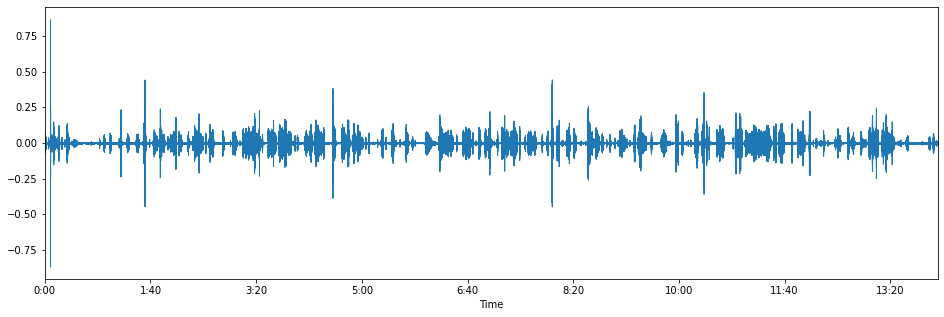

In [ ]:
plt.figure(figsize=(16, 5))
librosa.display.waveplot(first, sr=SAMPLERATE)

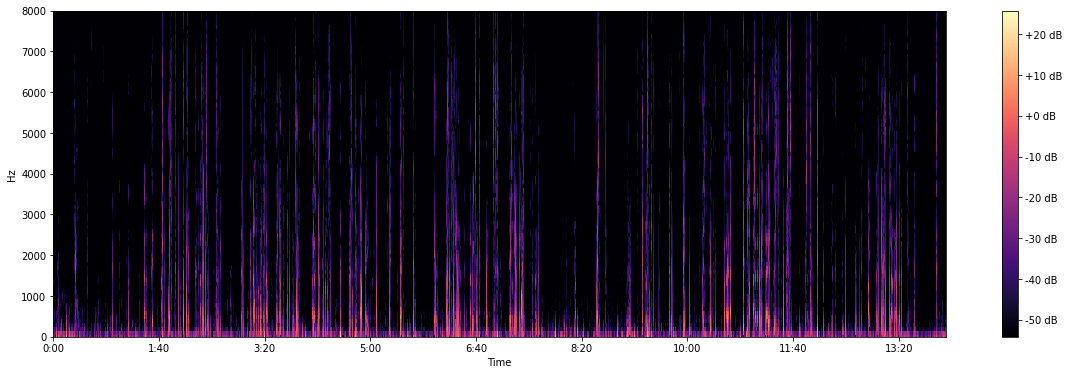

In [ ]:
X = librosa.stft(first, n_fft=160, hop_length=160, center=False, window=hann_window)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 6))
librosa.display.specshow(Xdb, sr=SAMPLERATE, hop_length=160, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

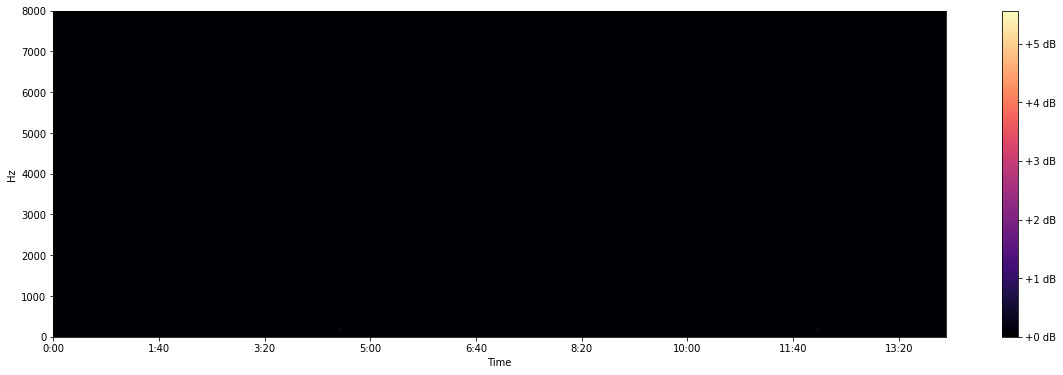

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
plt.figure(figsize=(20, 6))
librosa.display.specshow(train_files.get(310), sr=SAMPLERATE, hop_length=160, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
fig.savefig('spec.png')

In [ ]:
valid_size = pd.read_pickle('/content/drive/MyDrive/validSize.pkl')
# train_size = pd.read_pickle('/content/drive/MyDrive/trainSize.pkl')

In [ ]:
# test_size = pd.read_pickle('/content/drive/MyDrive/test_labels/y_test.pkl')

In [ ]:
test_size.keys()

In [ ]:
for key in test_size.keys():
     a = test_size.get(key).shape[0] - test_files.get(key).shape[0]
     print(a)
     if a != 0 :
       test_files[key] = test_files[key][:a, :]

In [ ]:
pd.to_pickle(all_X_test, "/content/drive/MyDrive/test_features/MFCCs/all_X_test")
# pd.to_pickle(valid_files_delta, "/content/drive/MyDrive/valid_features/MFCCs/X_valid_delta")

In [ ]:
# pd.to_pickle(train_files, "/content/drive/MyDrive/train_features/MelSpectogram/X_train.pkl")
# pd.to_pickle(train_files_delta, "/content/drive/MyDrive/train_melspectograms/X_train_delta.pkl")

In [ ]:
for key in valid_files.keys():
     a = valid_size.get(key) - valid_files.get(key).shape[0]
     print(a)
     if a != 0 :
       valid_files[key] = valid_files[key][:a, :]

In [ ]:
for key in train_files.keys():
  print(key, train_files[key].shape)

In [ ]:
def window_labels(dict_files, save_path):
  for key in dict_files.keys():
      mel = dict_files[key]
      filename = os.path.join(save_path,f"{key}.npy")
      windowed_mel = window_stack(mel, key)
      np.save(filename, windowed_mel)

In [ ]:
def window_stack(a, key, window_size=32):
  stacked_array = []
  print(a.shape)
  number_of_arrays = int(a.shape[0]/64) - 1
  for i in range(number_of_arrays):
    if (i * window_size) < a.shape[0]:
            array = a[i*window_size:window_size + i*window_size, :]
    else :
            array = a[-32:,:]
    stacked_array.append(array)
  print(key, a.shape[0], np.array(stacked_array).shape)
  return np.array(stacked_array)

In [ ]:
train_files=[]

In [ ]:
window_labels(train_files, '/content/drive/MyDrive/train_melspectograms')

In [ ]:
window_labels(train_labels, '/content/drive/MyDrive/train_labels')

In [ ]:
window_labels(valid_files, '/content/drive/MyDrive/valid_melspectograms')

In [ ]:
window_labels(valid_labels, '/content/drive/MyDrive/valid_labels')

In [ ]:
for key in train_labels.keys():
  print(train_labels[key].shape)